### Bank Customer Churn Prediction
* **EDA.ipynb** - Exploratory Data Analysis
* **Model.ipynb** - Model Building
* **app.py** - Flask App
* **templates** - HTML Templates
* **static** - CSS Stylesheet


::: callout-note
### Import necessary libraries
:::


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
set_seed = 42
sns.set_style('darkgrid')


#### read in the data 

In [31]:
data = pd.read_csv('Bank_Customer_Churn_Prediction.csv')
data.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Preprocessing

In [32]:
#write a function that does data preprocessing for the entire dataset
def data_preprocessing(data):
    #drop the row with missing values
    data.dropna(inplace=True)
    #drop the column with unique values
    data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
    #convert the categorical variables to dummy variables
    data = pd.get_dummies(data, drop_first=True)
    #split the data into features and target
    X = data.drop('Exited', axis=1)
    y = data['Exited']
    return X, y


In [33]:
# confirm if there are any missing values
data.isnull().sum()


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Exploration Data Analysis

In [35]:
#check the distribution of the target variable
data['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

* We observe that about 7963 customers have exited the bank, while 2037 customers have stayed with the bank. This is an imbalanced dataset.

churn
0    7963
1    2037
Name: count, dtype: int64


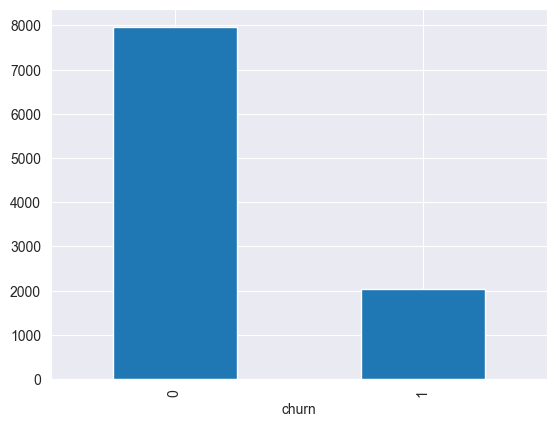

In [36]:
color_wheel = {1: "#0392cf",2: "#7bc043"}
colors = data['churn'].map(lambda x: color_wheel.get(x + 1))
print(data.churn.value_counts())
p=data.churn.value_counts().plot(kind="bar")



In [37]:
# check how many unique values are there in each column
data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [38]:
# check the distribution of the numerical variables
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Descriptive of the data is as follows:
* mean age of the customers is 38 years
* mean balance of the customers is 76485
* mean estimated salary of the customers is 100090
* mean credit score of the customers is 650
* mean tenure of the customers is 5 years
* mean number of products used by the customers is 1.5
* mean number of active members is 0.5
* mean number of customers who have credit card is 0.7
* mean number of customers who have exited the bank is 0.2


(<Axes: xlabel='gender'>,
 gender
 Male      5457
 Female    4543
 Name: count, dtype: int64)

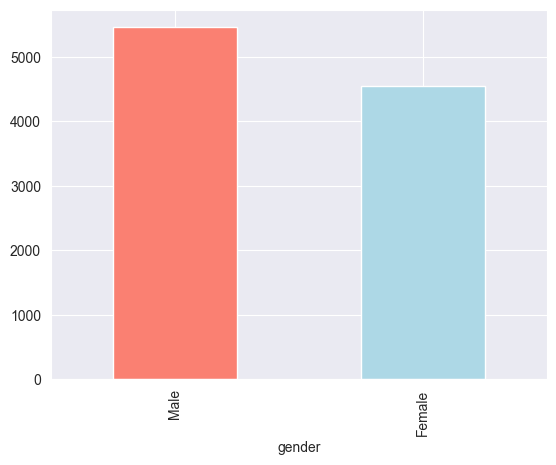

In [39]:
#plot how many females and males are there in the dataset
data['gender'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']), data['gender'].value_counts()



* we observe that in our dataset, we have `4543` females and `5457` males.
* which indicates that there are more males than females in our dataset.

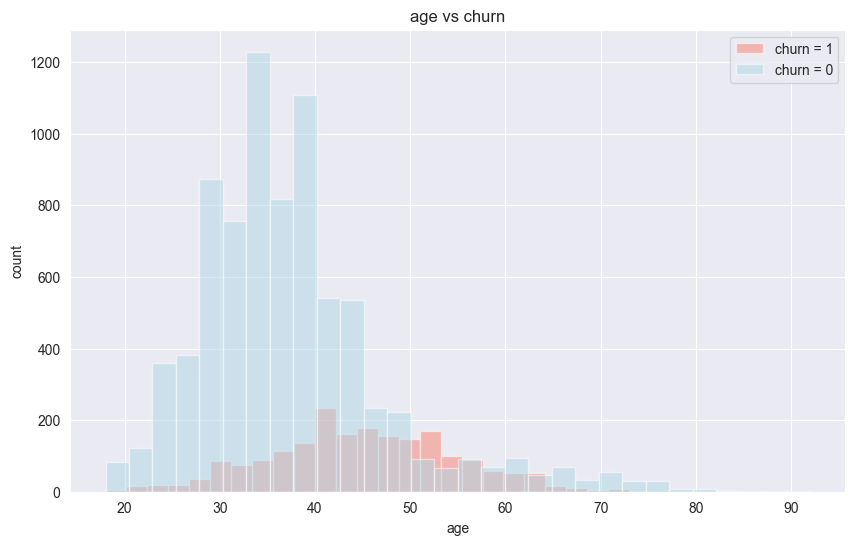

In [40]:
#plot gender with age
plt.figure(figsize=(10, 6))
data[data['churn'] == 1]['age'].hist(alpha=0.5, color='salmon', bins=30, label='churn = 1')
data[data['churn'] == 0]['age'].hist(alpha=0.5, color='lightblue', bins=30, label='churn = 0')
plt.legend()
plt.xlabel('age')
plt.ylabel('count')
plt.title('age vs churn')
plt.show()

* An observation of the distribution of the age of the customers shows that the age of the customers ranges from 18 to 92 years.
* The age of the customers is normally distributed with a mean of 38 years.


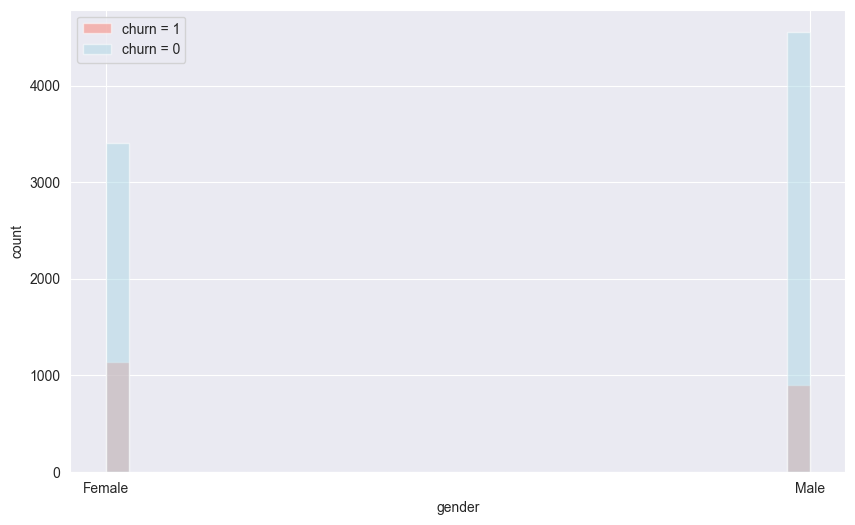

In [41]:
#plot gender with churn
plt.figure(figsize=(10, 6))
data[data['churn']==1]['gender'].hist(alpha=0.5, color='salmon', bins=30, label='churn = 1')
data[data['churn']==0]['gender'].hist(alpha=0.5, color='lightblue', bins=30, label='churn = 0')
plt.legend()
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [42]:
data[data['churn']==1]['gender'].value_counts(),data[data['churn']==0]['gender'].value_counts()

(gender
 Female    1139
 Male       898
 Name: count, dtype: int64,
 gender
 Male      4559
 Female    3404
 Name: count, dtype: int64)

* an observation based on gender and churn
* `1139` females `898` males churned
* `4559` Males and `3404` females churned

In [47]:
#one hotenconding the data for gender and country column
data['gender']=data['gender'].replace(['Female'],'0')
data['gender']=data['gender'].replace(['Male'],'1')
data['country']=data['country'].replace(['France'],'0')
data['country']=data['country'].replace(['Spain'],'1')
data['country']=data['country'].replace(['Germany'],'2')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [49]:
#drop customer id
data.drop(['customer_id'],axis=1,inplace=True)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [50]:
data.corr(method='pearson')


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.008267,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.008267,1.000000,-0.016936,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382,0.153771
gender,-0.002857,-0.016936,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,-0.003965,0.048092,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,0.001418,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.348700,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.006180,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,0.004036,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,-0.012692,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,0.007382,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


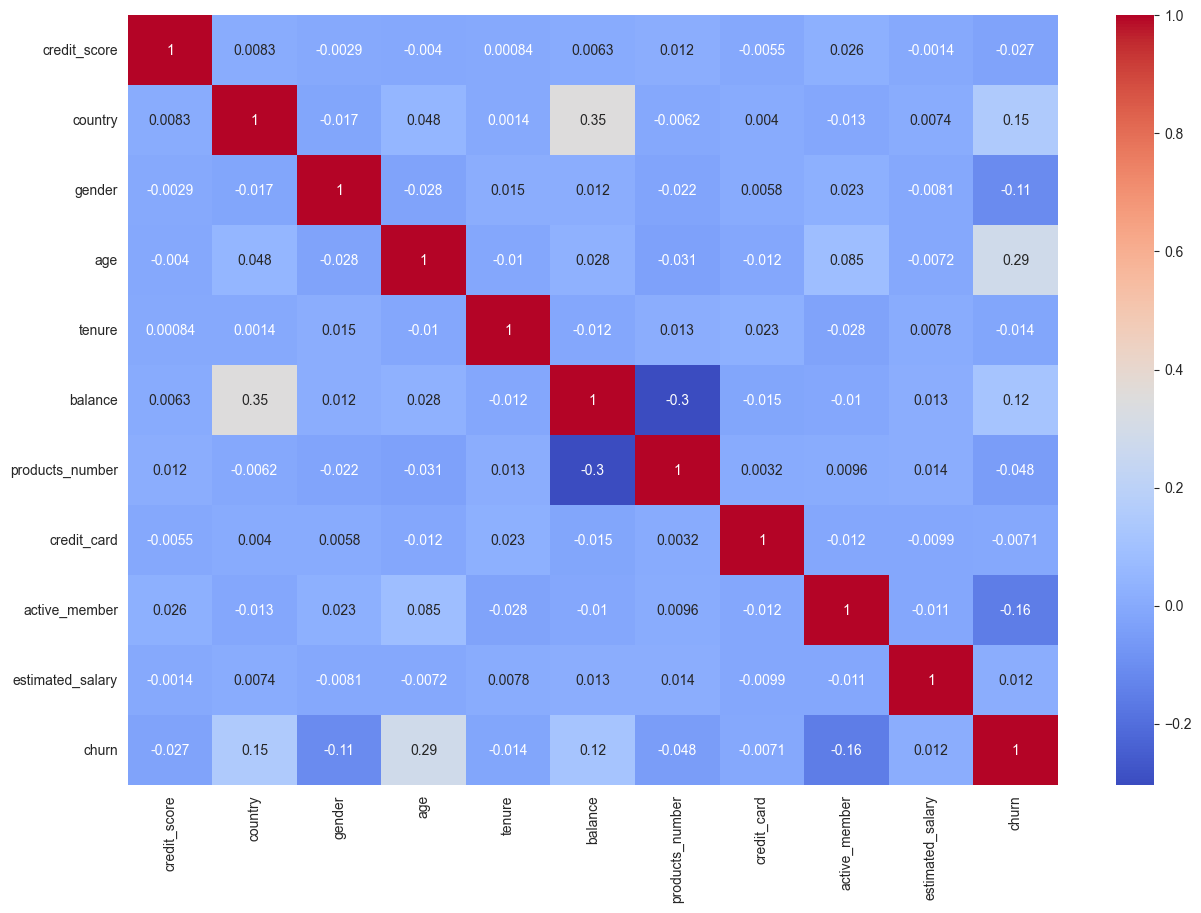

In [51]:
#plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

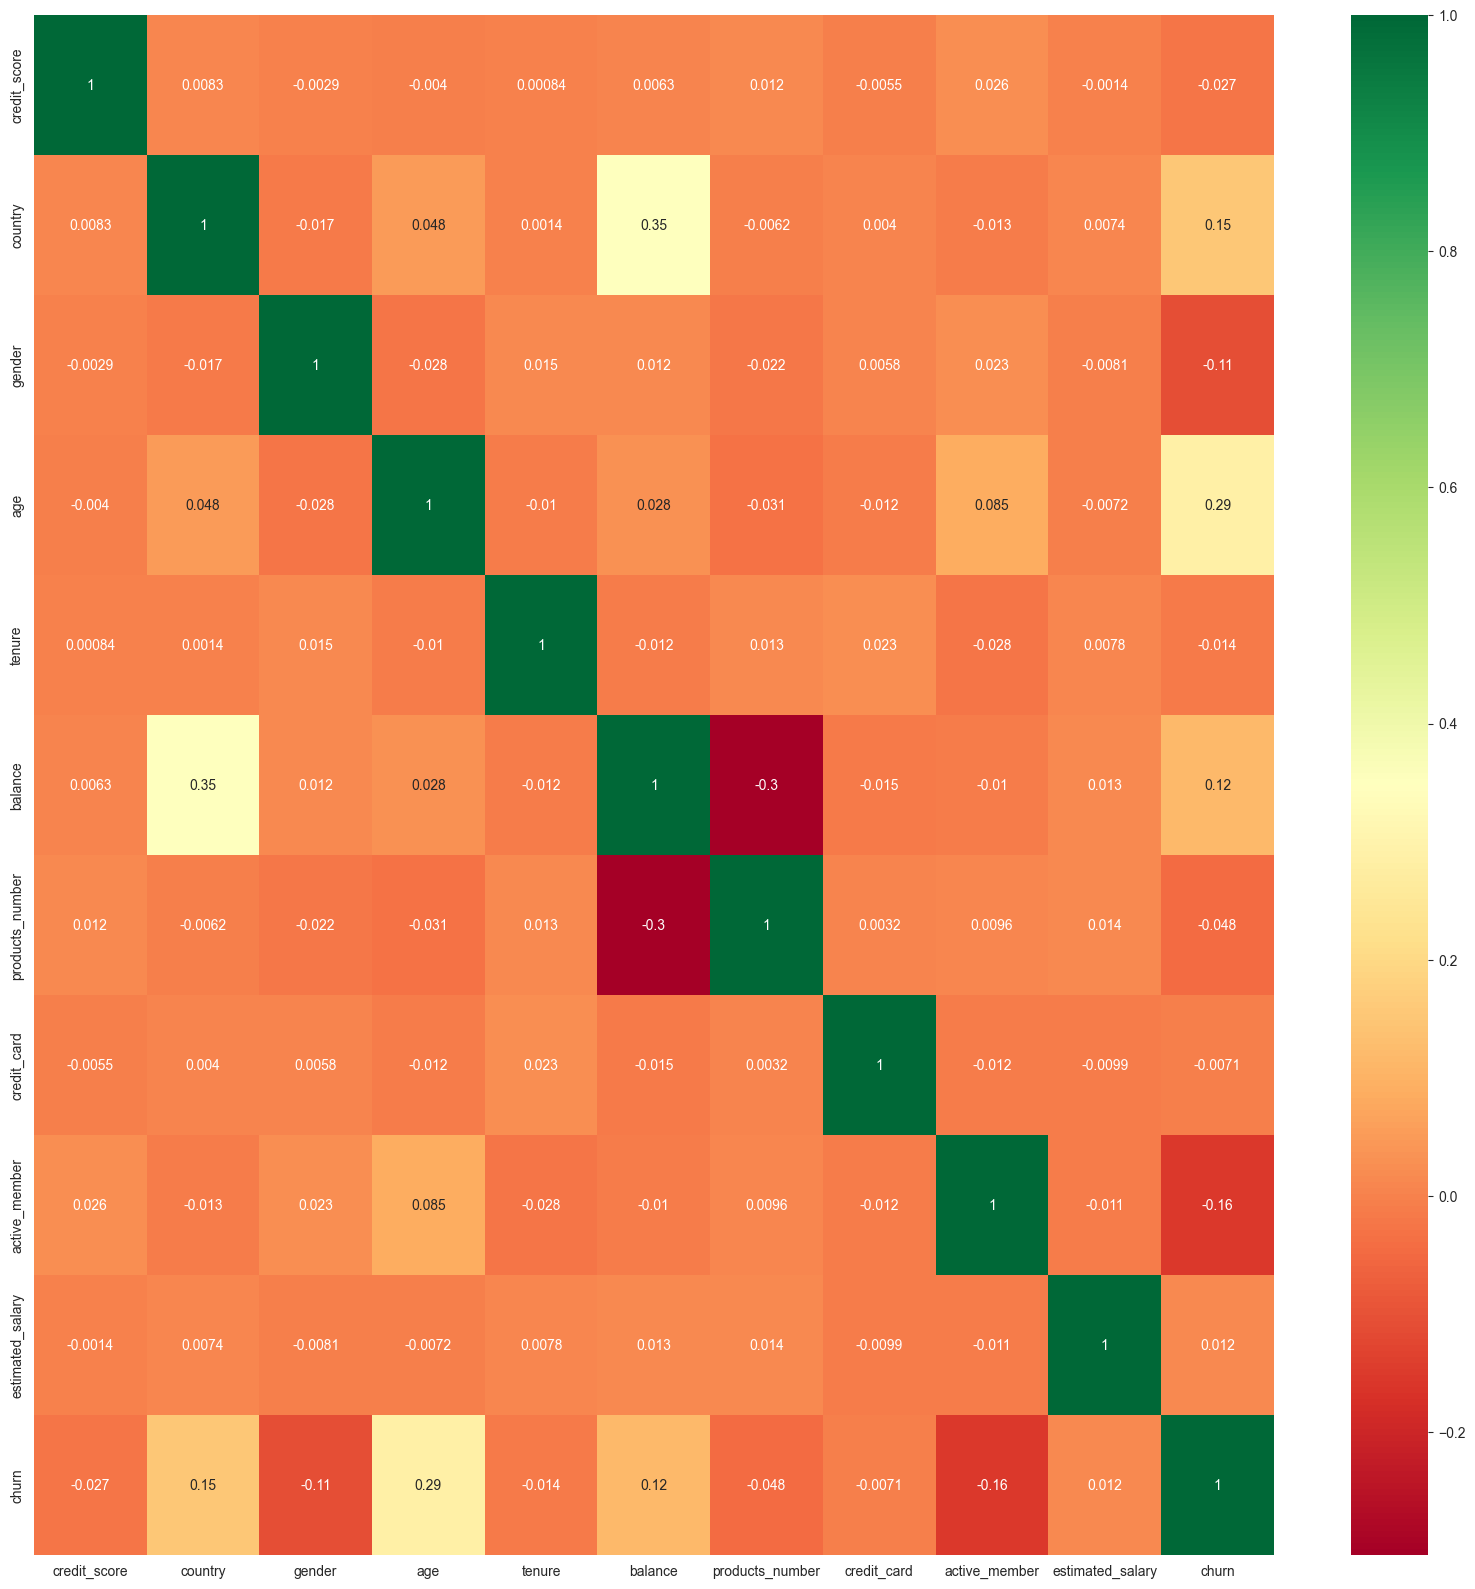

In [52]:
#get the correlation of each feature in the dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
#plot heat map
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='RdYlGn')


In [53]:
#select the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','score']  #naming the dataframe columns
print(featureScores.nlargest(10,'score'))  #print 10 best features


            features         score
5            balance  7.151303e+06
9   estimated_salary  4.835088e+04
10             churn  7.963000e+03
3                age  2.300417e+03
1            country  2.175407e+02
8      active_member  1.181994e+02
0       credit_score  1.054035e+02
2             gender  5.153993e+01
6    products_number  5.055394e+00
4             tenure  3.270538e+00


## Data Modelling

In [55]:
#split the data into features and target
from sklearn.model_selection import train_test_split
X = data.drop('churn', axis=1)
y = data['churn']
#split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=set_seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8000, 10), (2000, 10), (8000,), (2000,))

In [56]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
#build the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, y_pred)))


Accuracy score: 0.8145
Confusion matrix: 
[[1544   63]
 [ 308   85]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.22      0.31       393

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000



In [58]:
# build random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, y_pred)))


Accuracy score: 0.862
Confusion matrix: 
[[1539   68]
 [ 208  185]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [59]:
#build XGBoost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, y_pred)))


Accuracy score: 0.861
Confusion matrix: 
[[1530   77]
 [ 201  192]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



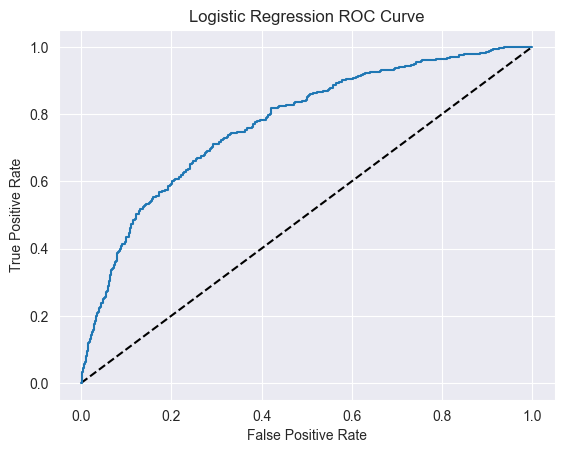

AUC score: 0.7726881914524717


In [60]:
#plot roc_curve and roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC score: {}'.format(auc_score))


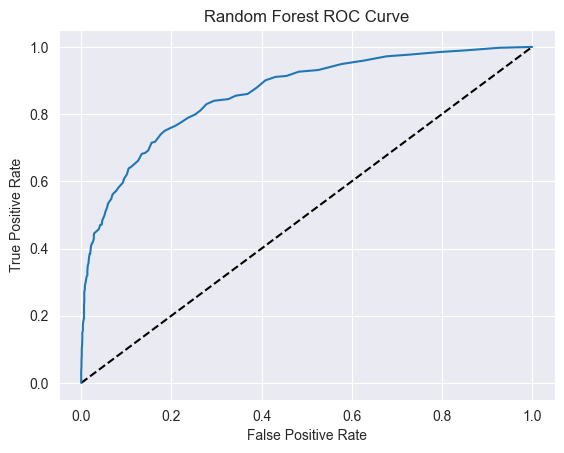

AUC score: 0.8613706573182531


In [63]:
#plot roc_curve and roc_auc_curve for random forest
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC score: {}'.format(auc_score))


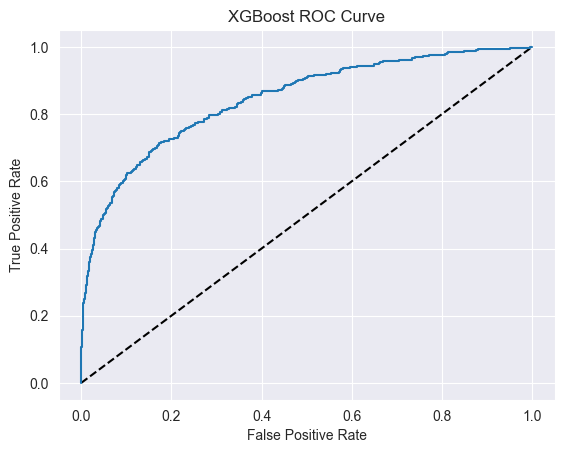

AUC score: 0.8447599639617385


In [64]:
#plot roc_curve and roc_auc_curve for XGBoost
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC score: {}'.format(auc_score))


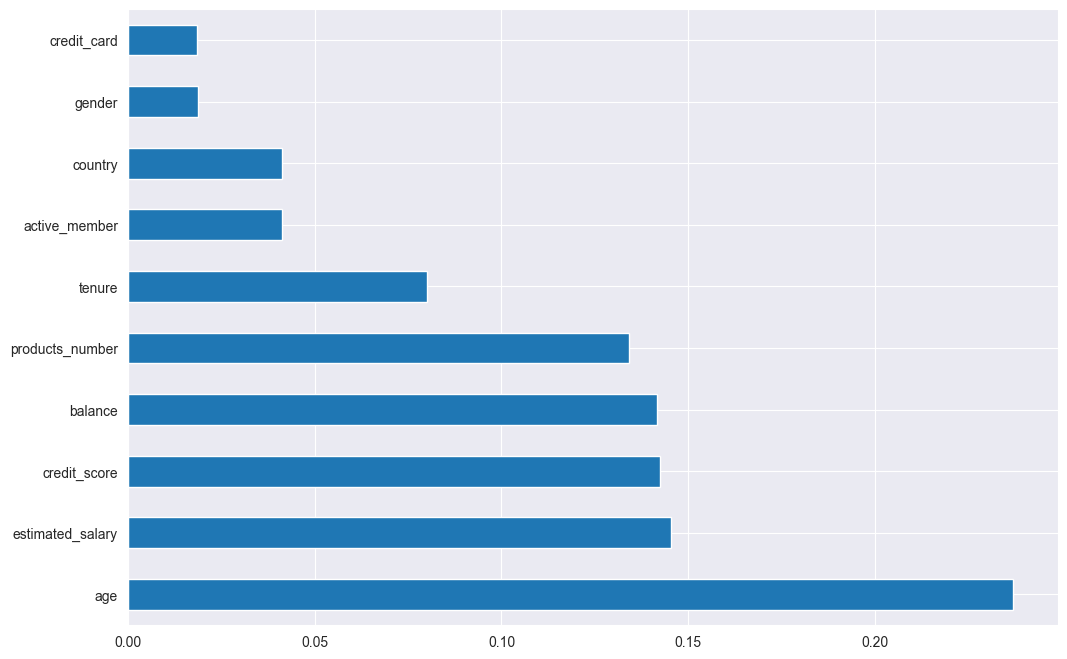

In [65]:
#plot the feature importance
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [66]:
#solve the imbalance problem
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=set_seed)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train.shape, y_train.shape


((12712, 10), (12712,))

In [67]:
#build the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, y_pred)))


Accuracy score: 0.7225
Confusion matrix: 
[[1166  441]
 [ 114  279]]
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.39      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000



In [68]:
#build random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, y_pred)))


Accuracy score: 0.8455
Confusion matrix: 
[[1456  151]
 [ 158  235]]
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1607
           1       0.61      0.60      0.60       393

    accuracy                           0.85      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [69]:
#build XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

Accuracy score: 0.8595
Confusion matrix: 
[[1503  104]
 [ 177  216]]


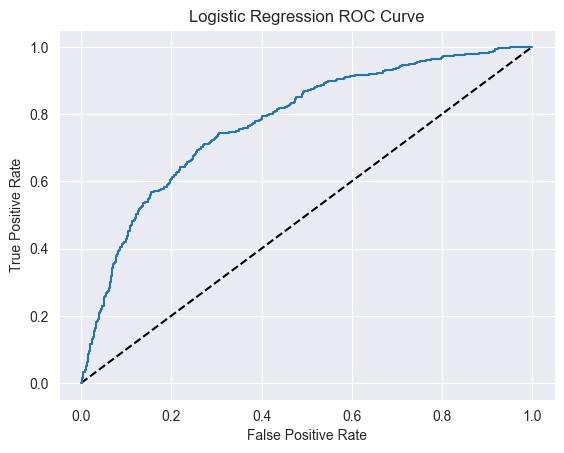

AUC score: 0.7772594770651935


In [71]:
#plot roc_curve and roc_auc_score
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC score: {}'.format(auc_score))

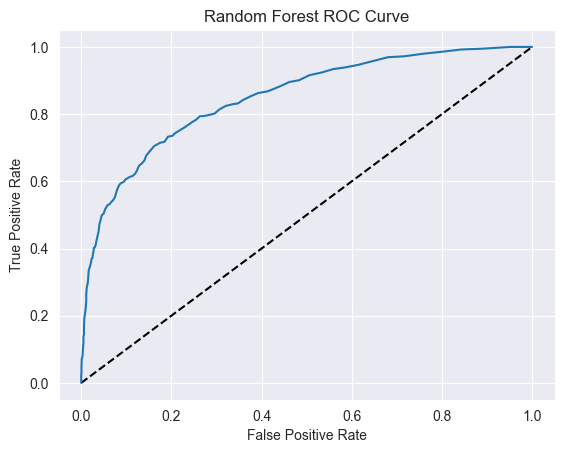

AUC score: 0.8487414318083575


In [72]:
#plot roc_curve and roc_auc_curve for random forest
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC score: {}'.format(auc_score))


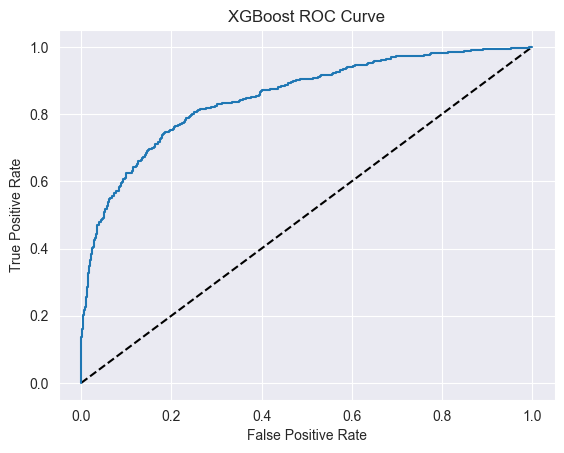

In [73]:
#plot roc_curve and roc_auc_curve for XGBoost
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()